In [1]:
'''
Cufflinks is another library that connects the Pandas data frame with Plotly enabling users 
to create visualizations directly from Pandas. The library binds the power of Plotly with the 
flexibility of Pandas for easy plotting


The plotly Python library is an interactive, open-source plotting library that supports 
over 40 unique chart types covering a wide range of statistical, financial, geographic, 
scientific, and 3-dimensional use-cases.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot
import cufflinks as cf
import seaborn as sns
%matplotlib inline
import os


In [2]:
os.getcwd()

'C:\\Users\\Noble'

In [3]:
os.chdir ('C:\\Noble\\Training\\Top Mentor\\Training\Presentation\\Project\\Project 12 Flight Price Predict Heroku\\')
os.getcwd()


'C:\\Noble\\Training\\Top Mentor\\Training\\Presentation\\Project\\Project 12 Flight Price Predict Heroku'

In [4]:
df=pd.read_excel("Data_Train.xlsx")
display(df)

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

In [5]:
#Automated Exploratory Data Analysis (EDA) 
#Pandas Profiling Report 

import pandas_profiling as pf
display(pf.ProfileReport(df))

In [6]:
# Number of records
len(df)

10683

In [7]:
# Number of records
display (df.shape)

(10683, 11)

In [8]:
#checking the data types
display (df.dtypes )

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
#Checking null values
display (df.isna().sum() )

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
#Remove the NaN values (records) from the dataset
df.dropna(how='any',inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
# Display Number of records- Number of records reduced by 1 , since we removed null record
display (df.shape)

(10682, 11)

In [12]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [13]:
# Feature Engineering
#Split Date of Journey column to Day and Month 
# Convert Date_of_Journey to its appropriate format as datetime with regards to day and month. Added two additional columns Day and Month
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey']) # Chanage Data type- from Object to Date and Time
df['Day_of_Journey']=(df['Date_of_Journey']).dt.day # Day column 
df['Month_of_Journey']=(df['Date_of_Journey']).dt.month # Month Column 
display(df)


Airline Date_of_Journey    Source Destination  \
0           IndiGo      2019-03-24  Banglore   New Delhi   
1        Air India      2019-01-05   Kolkata    Banglore   
2      Jet Airways      2019-09-06     Delhi      Cochin   
3           IndiGo      2019-12-05   Kolkata    Banglore   
4           IndiGo      2019-01-03  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia      2019-09-04   Kolkata    Banglore   
10679    Air India      2019-04-27   Kolkata    Banglore   
10680  Jet Airways      2019-04-27  Banglore       Delhi   
10681      Vistara      2019-01-03  Banglore   New Delhi   
10682    Air India      2019-09-05     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  Day_of_Journey  Month_of_Journey  
0             No info   3897              24                 3  
1             No info   7662               5                 1  
2             No info  13882               6                 9  
3             No info   6218               5                12  
4             No info  13302               3                 1  
...               ...    ...             ...               ...  
10678         No info   4107               4                 9  
10679         No info   4145              27                 4  
10680         No info   7229              27                 4  
10681         No info  12648               3                 1  
10682         No info  11753               5                 9  

[10682 rows x 13 columns]

In [14]:
# Drop the column - Date_of_journey
df.drop(["Date_of_Journey"],axis=1,inplace=True)
display(df.head())

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time Duration Total_Stops Additional_Info  Price  Day_of_Journey  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897              24   
1         13:15   7h 25m     2 stops         No info   7662               5   
2  04:25 10 Jun      19h     2 stops         No info  13882               6   
3         23:30   5h 25m      1 stop         No info   6218               5   
4         21:35   4h 45m      1 stop         No info  13302               3   

   Month_of_Journey  
0                 3  
1                 1  
2                 9  
3                12  
4                 1

In [15]:
#convert to datetime and Split Dep_Time column to hour and minutes 
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute
display(df.head())

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time Duration Total_Stops Additional_Info  Price  Day_of_Journey  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897              24   
1         13:15   7h 25m     2 stops         No info   7662               5   
2  04:25 10 Jun      19h     2 stops         No info  13882               6   
3         23:30   5h 25m      1 stop         No info   6218               5   
4         21:35   4h 45m      1 stop         No info  13302               3   

   Month_of_Journey  Dep_hr  Dep_min  
0                 3      22       20  
1                 1       5       50  
2                 9       9       25  
3                12      18        5  
4                 1      16       50

In [16]:
#Drop the column 'Dep_Time'

df.drop(["Dep_Time"],axis=1,inplace=True)
display(df.head())

Airline    Source Destination                  Route  Arrival_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL  01:10 22 Mar   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR         13:15   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  04:25 10 Jun   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR         23:30   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL         21:35   

  Duration Total_Stops Additional_Info  Price  Day_of_Journey  \
0   2h 50m    non-stop         No info   3897              24   
1   7h 25m     2 stops         No info   7662               5   
2      19h     2 stops         No info  13882               6   
3   5h 25m      1 stop         No info   6218               5   
4   4h 45m      1 stop         No info  13302               3   

   Month_of_Journey  Dep_hr  Dep_min  
0                 3      22       20  
1                 1       5       50  
2                 9       9       25  
3                12      18        5  
4                 1      16       50

In [17]:
#convert to datetime and Split Arrival_Time column to hour and minutes 
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute
display(df.head())

Airline    Source Destination                  Route  Arrival_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL  01:10 22 Mar   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR         13:15   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  04:25 10 Jun   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR         23:30   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL         21:35   

  Duration Total_Stops Additional_Info  Price  Day_of_Journey  \
0   2h 50m    non-stop         No info   3897              24   
1   7h 25m     2 stops         No info   7662               5   
2      19h     2 stops         No info  13882               6   
3   5h 25m      1 stop         No info   6218               5   
4   4h 45m      1 stop         No info  13302               3   

   Month_of_Journey  Dep_hr  Dep_min  Arrival_hr  Arrival_min  
0                 3      22       20           1           10  
1                 1       5       50          13           15  
2                 9       9       25           4           25  
3                12      18        5          23           30  
4                 1      16       50          21           35

In [18]:
#Drop the column 'Arrival_Time'

df.drop(["Arrival_Time"],axis=1,inplace=True)
display(df.head())

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Day_of_Journey  Month_of_Journey  \
0    non-stop         No info   3897              24                 3   
1     2 stops         No info   7662               5                 1   
2     2 stops         No info  13882               6                 9   
3      1 stop         No info   6218               5                12   
4      1 stop         No info  13302               3                 1   

   Dep_hr  Dep_min  Arrival_hr  Arrival_min  
0      22       20           1           10  
1       5       50          13           15  
2       9       25           4           25  
3      18        5          23           30  
4      16       50          21           35

In [19]:

display (df['Duration'])

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [20]:
'''
split duration datapoints based on space ' '

expand : bool, default False

Expand the splitted strings into separate columns.

If True, return DataFrame/MultiIndex expanding dimensionality.
If False, return Series/Index, containing lists of strings.
'''

duration=df['Duration'].str.split(' ',expand=True) 
display (duration)

0     1
0       2h   50m
1       7h   25m
2      19h  None
3       5h   25m
4       4h   45m
...    ...   ...
10678   2h   30m
10679   2h   35m
10680   3h  None
10681   2h   40m
10682   8h   20m

[10682 rows x 2 columns]

In [21]:
#In column 1 ie minutes column fill all NULL values with  '00m'
duration[1].fillna('00m',inplace=True)  
display (duration)

0    1
0       2h  50m
1       7h  25m
2      19h  00m
3       5h  25m
4       4h  45m
...    ...  ...
10678   2h  30m
10679   2h  35m
10680   3h  00m
10681   2h  40m
10682   8h  20m

[10682 rows x 2 columns]

In [22]:
#Extract the hours ie 0th column by excluding last character h x[:-1]
#select the item at index o and leave the last one (in this case the 'h')
df['duration_hr']=duration[0].apply(lambda x: x[:-1]) 
display (df['duration_hr'])

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: duration_hr, Length: 10682, dtype: object

In [23]:
#Extract the minutes, select the item at index 1 and leave the last one (in this case the 'm')
df['duration_min']=duration[1].apply(lambda x: x[:-1]) 
display (df['duration_min'])

0        50
1        25
2        00
3        25
4        45
         ..
10678    30
10679    35
10680    00
10681    40
10682    20
Name: duration_min, Length: 10682, dtype: object

In [24]:
#Drop the column'Duration'

df.drop(["Duration"],axis=1,inplace=True)
display (df)

Airline    Source Destination                  Route Total_Stops  \
0           IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1        Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2      Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3           IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4           IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   
...            ...       ...         ...                    ...         ...   
10678     Air Asia   Kolkata    Banglore              CCU → BLR    non-stop   
10679    Air India   Kolkata    Banglore              CCU → BLR    non-stop   
10680  Jet Airways  Banglore       Delhi              BLR → DEL    non-stop   
10681      Vistara  Banglore   New Delhi              BLR → DEL    non-stop   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK     2 stops   

      Additional_Info  Price  Day_of_Journey  Month_of_Journey  Dep_hr  \
0             No info   3897              24                 3      22   
1             No info   7662               5                 1       5   
2             No info  13882               6                 9       9   
3             No info   6218               5                12      18   
4             No info  13302               3                 1      16   
...               ...    ...             ...               ...     ...   
10678         No info   4107               4                 9      19   
10679         No info   4145              27                 4      20   
10680         No info   7229              27                 4       8   
10681         No info  12648               3                 1      11   
10682         No info  11753               5                 9      10   

       Dep_min  Arrival_hr  Arrival_min duration_hr duration_min  
0           20           1           10           2           50  
1           50          13           15           7           25  
2           25           4           25          19           00  
3            5          23           30           5           25  
4           50          21           35           4           45  
...        ...         ...          ...         ...          ...  
10678       55          22           25           2           30  
10679       45          23           20           2           35  
10680       20          11           20           3           00  
10681       30          14           10           2           40  
10682       55          19           15           8           20  

[10682 rows x 15 columns]

In [25]:
# Config file
cf.set_config_file(theme='ggplot',sharing='public',offline=True)

In [26]:
# Count of Airlines 
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



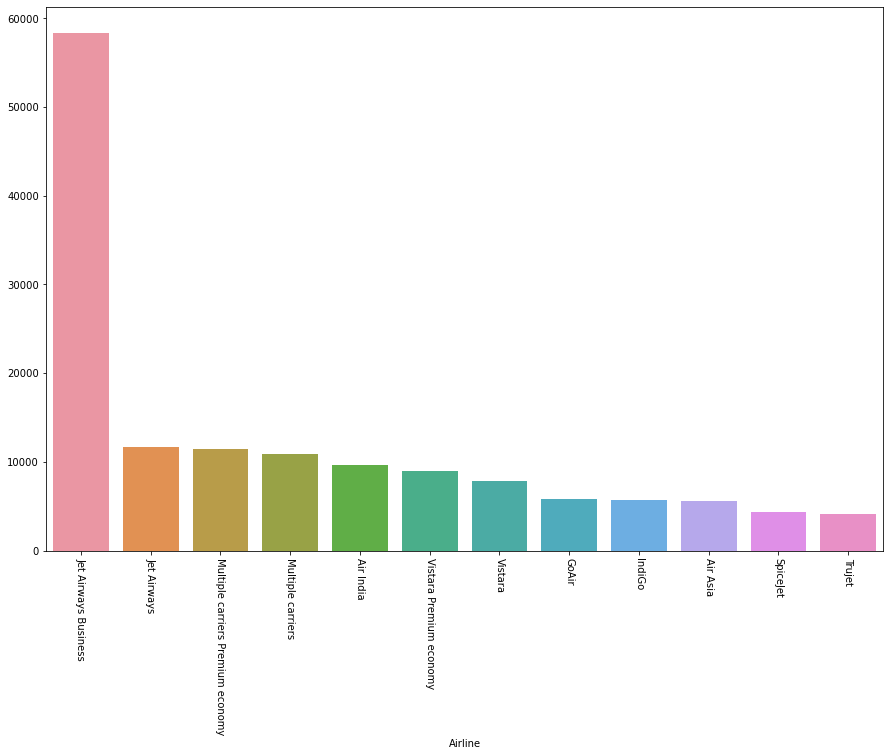

In [27]:
#Airline VS average Price
#Jet Airways Business has the highest price with Trujet having the lowest
Airprices=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(Airprices.index,Airprices.values)
plt.xticks(rotation=270)
plt.show()

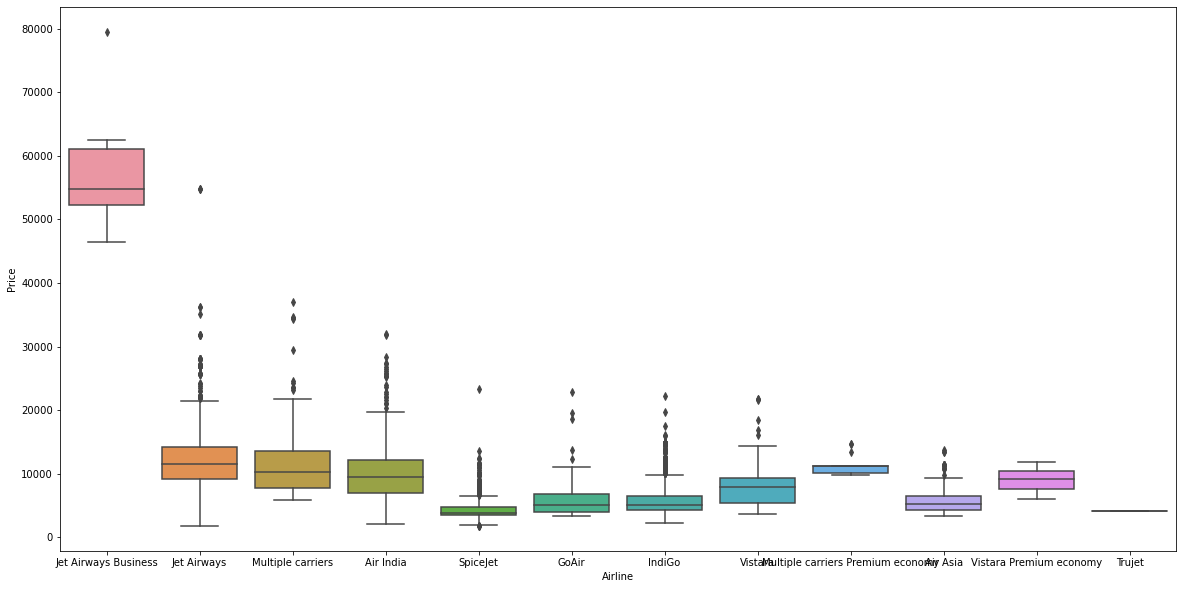

In [28]:
# Box Plot Airline VS Price
plt.figure(figsize=(20,10))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.show()

In [29]:
# Price based on number of stops
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

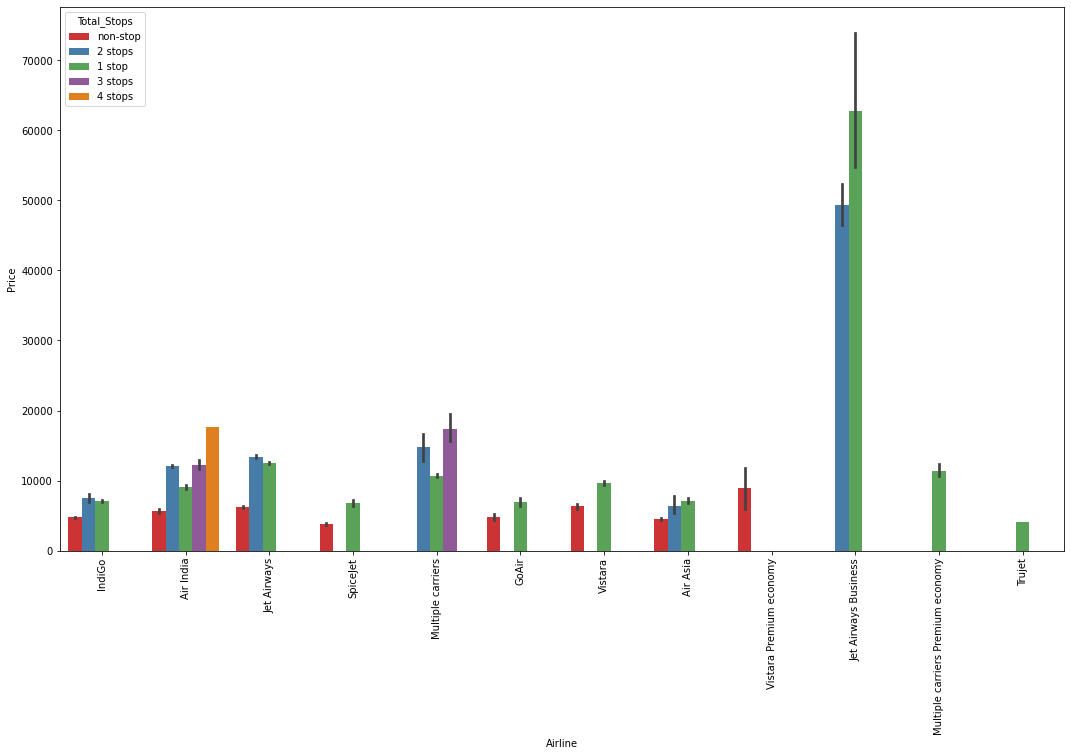

In [30]:
# Bar Plot - Same Details as chart 
#One stop and two stops Jet Airways Business is having the highest price

plt.figure(figsize=(18,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [31]:
# Number of flights from different Airports
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

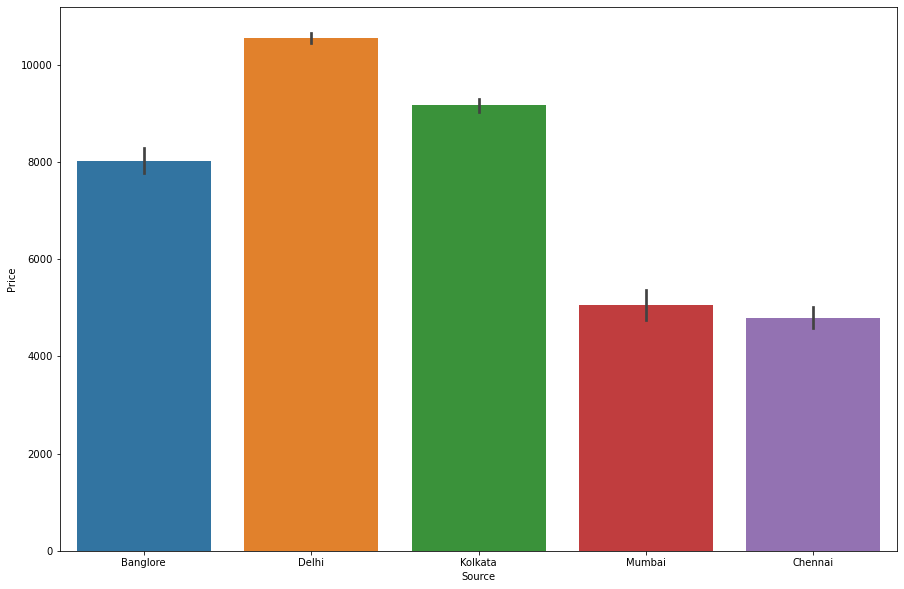

In [32]:
# Source vs Price
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show()

In [33]:
# Flights in the destination
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

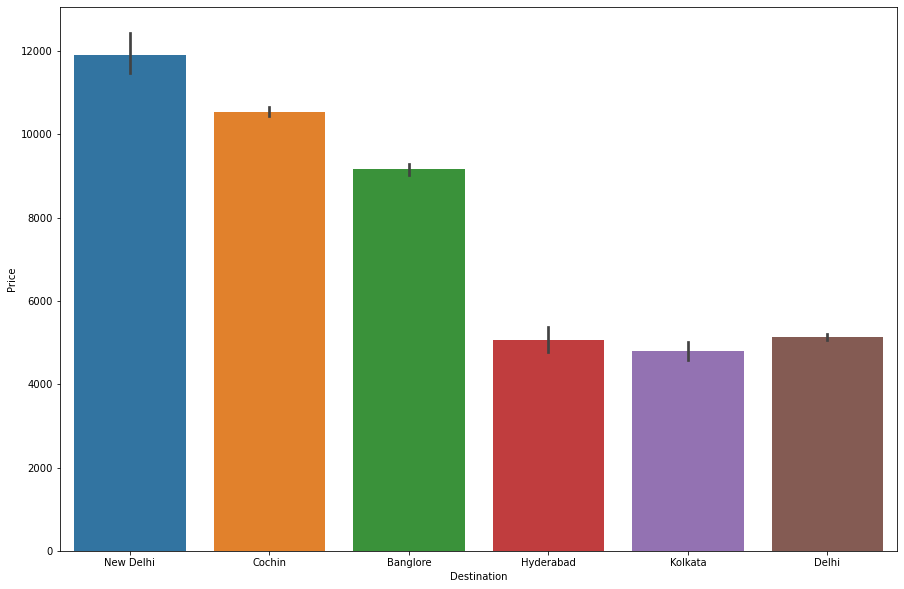

In [34]:
#Destination vs Price
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show()

In [35]:
# There is New Delhi and Delhi in the data set, replace New Delhi with Delhi
for i in df:
    df.replace('New Delhi','Delhi',inplace=True)

In [36]:
# Display Unique Destinations
display(df['Destination'].unique())

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [37]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

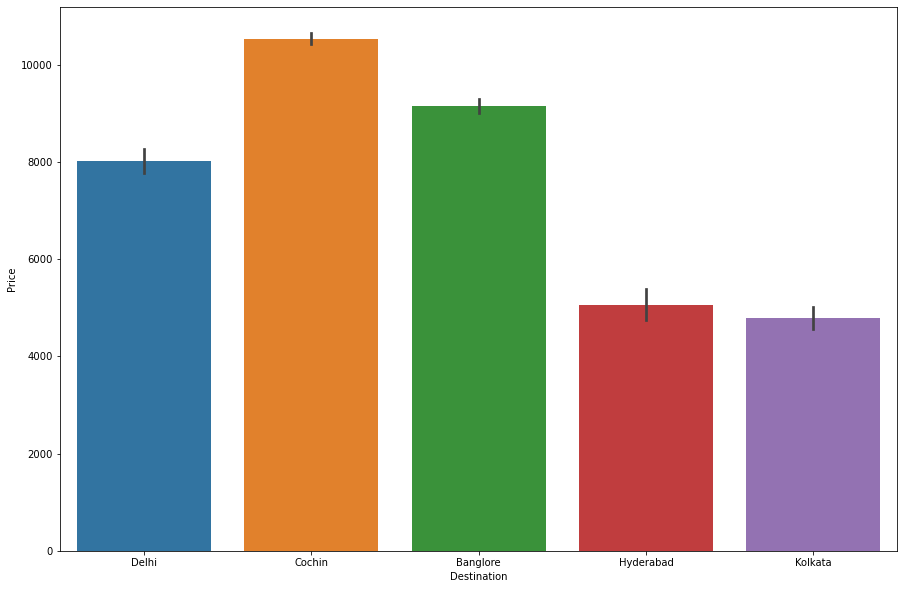

In [38]:
# Create Bar Plot again with Price 
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show()

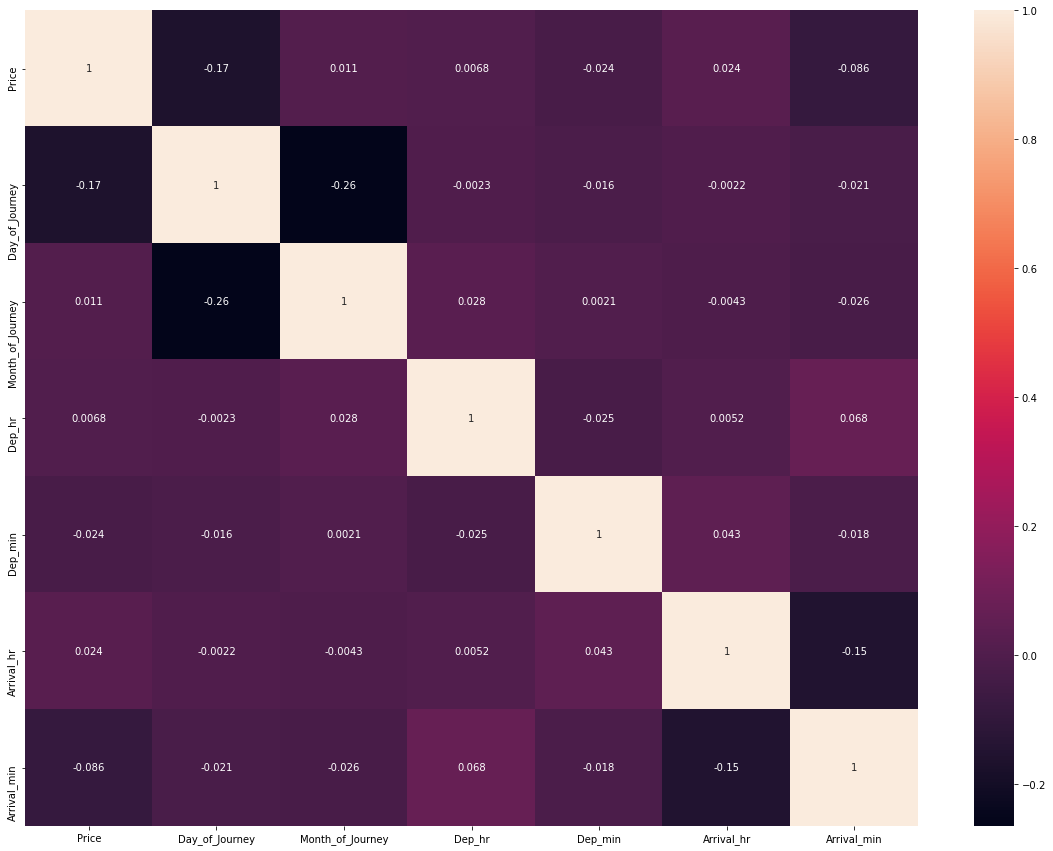

In [39]:
# Create Heat Map
#The features are less correlated which is a good thing for us to avoid Multicollinearity
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [40]:
display (df.head(4))

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore       Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   

  Additional_Info  Price  Day_of_Journey  Month_of_Journey  Dep_hr  Dep_min  \
0         No info   3897              24                 3      22       20   
1         No info   7662               5                 1       5       50   
2         No info  13882               6                 9       9       25   
3         No info   6218               5                12      18        5   

   Arrival_hr  Arrival_min duration_hr duration_min  
0           1           10           2           50  
1          13           15           7           25  
2           4           25          19           00  
3          23           30           5           25

In [41]:
# Label Encoding - Column 'Total_Stops'
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
display (df.head(4))

Airline    Source Destination                  Route  Total_Stops  \
0       IndiGo  Banglore       Delhi              BLR → DEL            0   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR            2   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK            2   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR            1   

  Additional_Info  Price  Day_of_Journey  Month_of_Journey  Dep_hr  Dep_min  \
0         No info   3897              24                 3      22       20   
1         No info   7662               5                 1       5       50   
2         No info  13882               6                 9       9       25   
3         No info   6218               5                12      18        5   

   Arrival_hr  Arrival_min duration_hr duration_min  
0           1           10           2           50  
1          13           15           7           25  
2           4           25          19           00  
3          23           30           5           25

In [42]:
# One Hot Encoding -Column "Airline"- Due to drop_first, there is no column for Air Asia
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)
display (air_dummy)

Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0              0      0       1            0                     0   
1              1      0       0            0                     0   
2              0      0       0            1                     0   
3              0      0       1            0                     0   
4              0      0       1            0                     0   
...          ...    ...     ...          ...                   ...   
10678          0      0       0            0                     0   
10679          1      0       0            0                     0   
10680          0      0       0            1                     0   
10681          0      0       0            0                     0   
10682          1      0       0            0                     0   

       Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0                      0                                  0         0       0   
1                      0                                  0         0       0   
2                      0                                  0         0       0   
3                      0                                  0         0       0   
4                      0                                  0         0       0   
...                  ...                                ...       ...     ...   
10678                  0                                  0         0       0   
10679                  0                                  0         0       0   
10680                  0                                  0         0       0   
10681                  0                                  0         0       0   
10682                  0                                  0         0       0   

       Vistara  Vistara Premium economy  
0            0                        0  
1            0                        0  
2            0                        0  
3            0                        0  
4            0                        0  
...        ...                      ...  
10678        0                        0  
10679        0                        0  
10680        0                        0  
10681        1                        0  
10682        0                        0  

[10682 rows x 11 columns]

In [43]:
#One hot encoding for columns 'Source','Destination' Due to drop first Source Cochin column Dropped 
source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
display (source_dest_dummy)

Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0                   0             0               0              0   
1                   0             0               1              0   
2                   0             1               0              0   
3                   0             0               1              0   
4                   0             0               0              0   
...               ...           ...             ...            ...   
10678               0             0               1              0   
10679               0             0               1              0   
10680               0             0               0              0   
10681               0             0               0              0   
10682               0             1               0              0   

       Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                       0                  1                      0   
1                       0                  0                      0   
2                       1                  0                      0   
3                       0                  0                      0   
4                       0                  1                      0   
...                   ...                ...                    ...   
10678                   0                  0                      0   
10679                   0                  0                      0   
10680                   0                  1                      0   
10681                   0                  1                      0   
10682                   1                  0                      0   

       Destination_Kolkata  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
10678                    0  
10679                    0  
10680                    0  
10681                    0  
10682                    0  

[10682 rows x 8 columns]

In [44]:
# Concatenate Label Encoded and one hot encoded columns into main data frame
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)
display (df.head(4))

Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0          0      0       1            0                     0   
1          1      0       0            0                     0   
2          0      0       0            1                     0   
3          0      0       1            0                     0   

   Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0                  0                                  0         0       0   
1                  0                                  0         0       0   
2                  0                                  0         0       0   
3                  0                                  0         0       0   

   Vistara  ...  Additional_Info  Price  Day_of_Journey  Month_of_Journey  \
0        0  ...          No info   3897              24                 3   
1        0  ...          No info   7662               5                 1   
2        0  ...          No info  13882               6                 9   
3        0  ...          No info   6218               5                12   

   Dep_hr  Dep_min  Arrival_hr  Arrival_min  duration_hr duration_min  
0      22       20           1           10            2           50  
1       5       50          13           15            7           25  
2       9       25           4           25           19           00  
3      18        5          23           30            5           25  

[4 rows x 34 columns]

In [45]:
#Drop Columns -Already Label Encoded or One Hot Encoded 
df.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [46]:
display (df.shape)

(10682, 31)

In [47]:
# Read Test Data
df_test=pd.read_excel("Test_set.xlsx")
display(df_test)

Airline Date_of_Journey    Source Destination  \
0           Jet Airways       6/06/2019     Delhi      Cochin   
1                IndiGo      12/05/2019   Kolkata    Banglore   
2           Jet Airways      21/05/2019     Delhi      Cochin   
3     Multiple carriers      21/05/2019     Delhi      Cochin   
4              Air Asia      24/06/2019  Banglore       Delhi   
...                 ...             ...       ...         ...   
2666          Air India       6/06/2019   Kolkata    Banglore   
2667             IndiGo      27/03/2019   Kolkata    Banglore   
2668        Jet Airways       6/03/2019     Delhi      Cochin   
2669          Air India       6/03/2019     Delhi      Cochin   
2670  Multiple carriers      15/06/2019     Delhi      Cochin   

                Route Dep_Time  Arrival_Time Duration Total_Stops  \
0     DEL → BOM → COK    17:30  04:25 07 Jun  10h 55m      1 stop   
1     CCU → MAA → BLR    06:20         10:20       4h      1 stop   
2     DEL → BOM → COK    19:15  19:00 22 May  23h 45m      1 stop   
3     DEL → BOM → COK    08:00         21:00      13h      1 stop   
4           BLR → DEL    23:55  02:45 25 Jun   2h 50m    non-stop   
...               ...      ...           ...      ...         ...   
2666  CCU → DEL → BLR    20:30  20:25 07 Jun  23h 55m      1 stop   
2667        CCU → BLR    14:20         16:55   2h 35m    non-stop   
2668  DEL → BOM → COK    21:50  04:25 07 Mar   6h 35m      1 stop   
2669  DEL → BOM → COK    04:00         19:15  15h 15m      1 stop   
2670  DEL → BOM → COK    04:55         19:15  14h 20m      1 stop   

                  Additional_Info  
0                         No info  
1                         No info  
2     In-flight meal not included  
3                         No info  
4                         No info  
...                           ...  
2666                      No info  
2667                      No info  
2668                      No info  
2669                      No info  
2670                      No info  

[2671 rows x 10 columns]

In [48]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

#Dep_time 
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

#Splitting duration  time

a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

#Handling Categorical Values 
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)


In [49]:
# Drop additional Columns
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)
display (df_test.head(4))

Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0          0      0       0            1                     0   
1          0      0       1            0                     0   
2          0      0       0            1                     0   
3          0      0       0            0                     0   

   Multiple carriers  Multiple carriers Premium economy  SpiceJet  Vistara  \
0                  0                                  0         0        0   
1                  0                                  0         0        0   
2                  0                                  0         0        0   
3                  1                                  0         0        0   

   Vistara Premium economy  ...  Destination_New Delhi  Total_Stops  \
0                        0  ...                      0            1   
1                        0  ...                      0            1   
2                        0  ...                      0            1   
3                        0  ...                      0            1   

   Day_of_Journey  Month_of_Journey  Dep_hr  Dep_min  Arrival_hr  Arrival_min  \
0               6                 6      17       30           4           25   
1               5                12       6       20          10           20   
2              21                 5      19       15          19            0   
3              21                 5       8        0          21            0   

   dur_hr  dur_min  
0      10       55  
1       4       00  
2      23       45  
3      13       00  

[4 rows x 28 columns]

In [50]:
print('train_shape',df.shape)
# Additional columns in training data set  'Route', 'Price','Additional_Info', can be removed later 
print('test_shape',df_test.shape)

train_shape (10682, 31)
test_shape (2671, 28)


In [51]:
# Create X and Y from Training Data 

x=df.drop(['Route', 'Price','Additional_Info'],axis=1)
y=df['Price']

In [52]:
display (x.head(3))

Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0          0      0       1            0                     0   
1          1      0       0            0                     0   
2          0      0       0            1                     0   

   Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0                  0                                  0         0       0   
1                  0                                  0         0       0   
2                  0                                  0         0       0   

   Vistara  ...  Destination_Kolkata  Total_Stops  Day_of_Journey  \
0        0  ...                    0            0              24   
1        0  ...                    0            2               5   
2        0  ...                    0            2               6   

   Month_of_Journey  Dep_hr  Dep_min  Arrival_hr  Arrival_min  duration_hr  \
0                 3      22       20           1           10            2   
1                 1       5       50          13           15            7   
2                 9       9       25           4           25           19   

   duration_min  
0            50  
1            25  
2            00  

[3 rows x 28 columns]

In [53]:
#ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
ET_Model=ExtraTreesRegressor()
ET_Model.fit(x,y)


ExtraTreesRegressor()

In [54]:
# Predict and Print Accuracy 
y_predict=ET_Model.predict(x)
display (r2_score(y,y_predict))

0.9633114000282472

<AxesSubplot:>

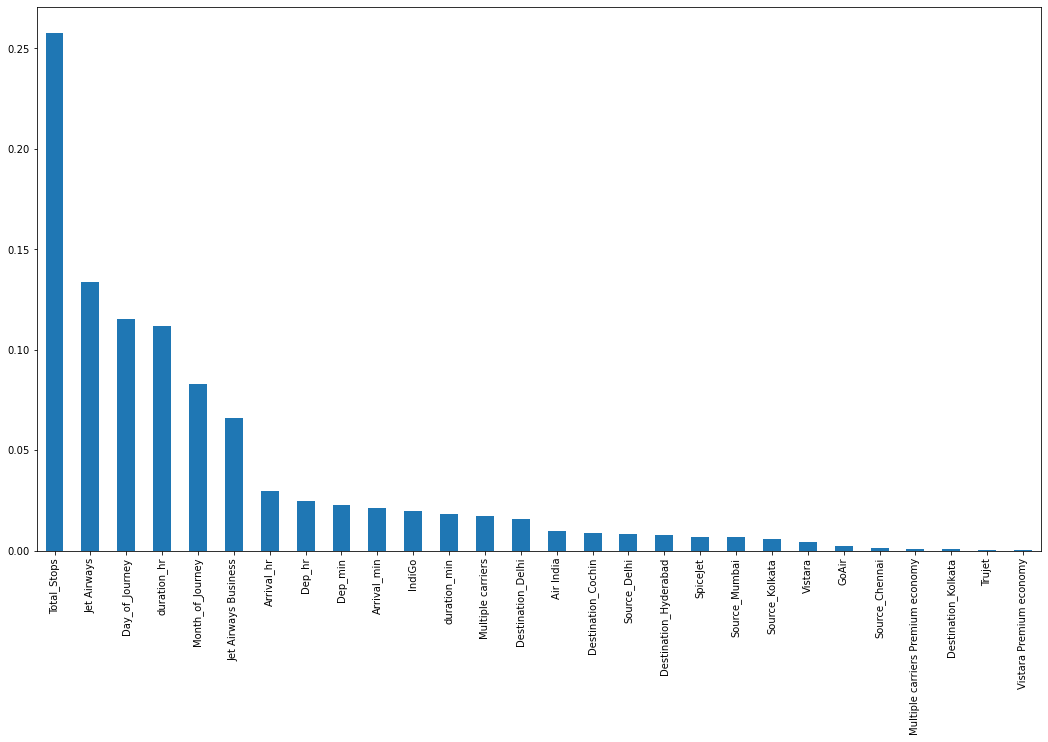

In [55]:
#Feature Importance Graph
pd.Series(ET_Model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))

In [56]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [57]:
#Preparing Extra Tree Regression with Training Data 
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)


ExtraTreesRegressor(n_estimators=120)

In [58]:
# Prediction and Print Accuracy
y_predict=ET_Model.predict(X_test)
from sklearn.metrics import r2_score
display (r2_score(y_test,y_predict))

0.7682181817807648

In [59]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor()
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
r2_score(y_test,y_predict)

0.7922179259644133

In [60]:
# Hyperparameter Tuning and RandomizedSearchCV - Model used - RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs = 1)

In [61]:
# Fit Model
rCV.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [62]:
# Prediction 
rf_pred=rCV.predict(X_test)
display (rf_pred)

array([12474.84114671,  4295.45694354,  6138.55592429, ...,
       11689.50058447,  9706.54064737,  8670.57141593])

In [63]:
# mean_absolute_error and mean_squared_error
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1156.4740670710803
MSE 3958612.9707966093


In [64]:
# Display Accuracy
display (r2_score(y_test,rf_pred))

0.8072136192022958

In [65]:
# Model CatBoostRegressor
from catboost import CatBoostRegressor
cat=CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.05718
0:	learn: 4466.5316537	total: 139ms	remaining: 2m 19s
1:	learn: 4319.1952920	total: 148ms	remaining: 1m 13s
2:	learn: 4170.0874200	total: 155ms	remaining: 51.6s
3:	learn: 4033.1061207	total: 161ms	remaining: 40.2s
4:	learn: 3909.5332929	total: 165ms	remaining: 32.8s
5:	learn: 3788.8771850	total: 168ms	remaining: 27.8s
6:	learn: 3677.5795256	total: 170ms	remaining: 24.2s
7:	learn: 3585.9715553	total: 173ms	remaining: 21.4s
8:	learn: 3499.6424958	total: 175ms	remaining: 19.3s
9:	learn: 3408.9602975	total: 178ms	remaining: 17.6s
10:	learn: 3329.4018172	total: 181ms	remaining: 16.2s
11:	learn: 3258.4306577	total: 183ms	remaining: 15.1s
12:	learn: 3188.9732731	total: 186ms	remaining: 14.1s
13:	learn: 3126.6519374	total: 188ms	remaining: 13.3s
14:	learn: 3064.8092738	total: 191ms	remaining: 12.5s
15:	learn: 3011.9738031	total: 193ms	remaining: 11.9s
16:	learn: 2960.0953295	total: 196ms	remaining: 11.3s
17:	learn: 2917.5532184	total: 199ms	remaining: 10.8s
18:	lea

203:	learn: 1879.9115917	total: 666ms	remaining: 2.6s
204:	learn: 1878.2024622	total: 669ms	remaining: 2.59s
205:	learn: 1876.5491935	total: 671ms	remaining: 2.59s
206:	learn: 1875.7912620	total: 673ms	remaining: 2.58s
207:	learn: 1874.8975405	total: 676ms	remaining: 2.57s
208:	learn: 1874.4832107	total: 678ms	remaining: 2.56s
209:	learn: 1873.0687112	total: 680ms	remaining: 2.56s
210:	learn: 1871.7010933	total: 683ms	remaining: 2.55s
211:	learn: 1870.3004288	total: 686ms	remaining: 2.55s
212:	learn: 1869.5272892	total: 688ms	remaining: 2.54s
213:	learn: 1867.3722104	total: 690ms	remaining: 2.54s
214:	learn: 1867.0684325	total: 693ms	remaining: 2.53s
215:	learn: 1865.1670373	total: 695ms	remaining: 2.52s
216:	learn: 1863.2110487	total: 698ms	remaining: 2.52s
217:	learn: 1862.9098189	total: 700ms	remaining: 2.51s
218:	learn: 1861.5219818	total: 703ms	remaining: 2.5s
219:	learn: 1860.1257880	total: 705ms	remaining: 2.5s
220:	learn: 1856.4667108	total: 708ms	remaining: 2.49s
221:	learn: 1

403:	learn: 1671.0132465	total: 1.15s	remaining: 1.7s
404:	learn: 1669.6052730	total: 1.16s	remaining: 1.7s
405:	learn: 1668.5677684	total: 1.16s	remaining: 1.7s
406:	learn: 1667.8235172	total: 1.16s	remaining: 1.69s
407:	learn: 1667.2640515	total: 1.16s	remaining: 1.69s
408:	learn: 1666.4183042	total: 1.17s	remaining: 1.69s
409:	learn: 1665.1922919	total: 1.17s	remaining: 1.68s
410:	learn: 1664.3444414	total: 1.17s	remaining: 1.68s
411:	learn: 1663.5322809	total: 1.17s	remaining: 1.67s
412:	learn: 1663.1110489	total: 1.18s	remaining: 1.67s
413:	learn: 1662.3295291	total: 1.18s	remaining: 1.67s
414:	learn: 1662.3178579	total: 1.18s	remaining: 1.66s
415:	learn: 1661.4256768	total: 1.18s	remaining: 1.66s
416:	learn: 1660.2996854	total: 1.19s	remaining: 1.66s
417:	learn: 1660.2883295	total: 1.19s	remaining: 1.65s
418:	learn: 1659.5739251	total: 1.19s	remaining: 1.65s
419:	learn: 1659.4331703	total: 1.19s	remaining: 1.65s
420:	learn: 1658.7654846	total: 1.2s	remaining: 1.64s
421:	learn: 16

571:	learn: 1562.4788015	total: 1.65s	remaining: 1.23s
572:	learn: 1561.9515071	total: 1.65s	remaining: 1.23s
573:	learn: 1561.3996844	total: 1.65s	remaining: 1.23s
574:	learn: 1560.7232462	total: 1.66s	remaining: 1.22s
575:	learn: 1560.7166069	total: 1.66s	remaining: 1.22s
576:	learn: 1560.3653283	total: 1.67s	remaining: 1.22s
577:	learn: 1560.3589083	total: 1.67s	remaining: 1.22s
578:	learn: 1559.3463316	total: 1.68s	remaining: 1.22s
579:	learn: 1559.1597505	total: 1.68s	remaining: 1.22s
580:	learn: 1559.1560512	total: 1.68s	remaining: 1.21s
581:	learn: 1558.4373278	total: 1.69s	remaining: 1.21s
582:	learn: 1557.9849492	total: 1.69s	remaining: 1.21s
583:	learn: 1557.9470459	total: 1.69s	remaining: 1.21s
584:	learn: 1556.6449363	total: 1.7s	remaining: 1.2s
585:	learn: 1555.9259679	total: 1.7s	remaining: 1.2s
586:	learn: 1555.2808913	total: 1.7s	remaining: 1.2s
587:	learn: 1554.6569249	total: 1.7s	remaining: 1.19s
588:	learn: 1554.1697493	total: 1.71s	remaining: 1.19s
589:	learn: 1553.

758:	learn: 1472.3058197	total: 2.14s	remaining: 679ms
759:	learn: 1472.0110004	total: 2.14s	remaining: 676ms
760:	learn: 1471.5231324	total: 2.14s	remaining: 673ms
761:	learn: 1471.5209949	total: 2.14s	remaining: 670ms
762:	learn: 1471.1386098	total: 2.15s	remaining: 667ms
763:	learn: 1470.3570407	total: 2.15s	remaining: 664ms
764:	learn: 1469.8520225	total: 2.15s	remaining: 661ms
765:	learn: 1469.8483934	total: 2.15s	remaining: 658ms
766:	learn: 1469.3414735	total: 2.16s	remaining: 655ms
767:	learn: 1468.8742368	total: 2.16s	remaining: 652ms
768:	learn: 1468.6593169	total: 2.16s	remaining: 649ms
769:	learn: 1468.4238280	total: 2.16s	remaining: 646ms
770:	learn: 1468.2419287	total: 2.17s	remaining: 644ms
771:	learn: 1467.8771263	total: 2.17s	remaining: 641ms
772:	learn: 1467.7027453	total: 2.17s	remaining: 638ms
773:	learn: 1467.1872726	total: 2.17s	remaining: 635ms
774:	learn: 1466.3956019	total: 2.18s	remaining: 632ms
775:	learn: 1466.0473430	total: 2.18s	remaining: 629ms
776:	learn

945:	learn: 1410.2869816	total: 2.63s	remaining: 150ms
946:	learn: 1410.1688619	total: 2.63s	remaining: 147ms
947:	learn: 1409.9576388	total: 2.63s	remaining: 144ms
948:	learn: 1409.7019315	total: 2.63s	remaining: 142ms
949:	learn: 1409.5539003	total: 2.64s	remaining: 139ms
950:	learn: 1409.4242917	total: 2.64s	remaining: 136ms
951:	learn: 1409.1164346	total: 2.65s	remaining: 133ms
952:	learn: 1408.9998123	total: 2.65s	remaining: 131ms
953:	learn: 1408.9456486	total: 2.65s	remaining: 128ms
954:	learn: 1408.3353653	total: 2.65s	remaining: 125ms
955:	learn: 1407.9314986	total: 2.65s	remaining: 122ms
956:	learn: 1407.6987672	total: 2.66s	remaining: 119ms
957:	learn: 1407.4323027	total: 2.66s	remaining: 117ms
958:	learn: 1406.9693403	total: 2.66s	remaining: 114ms
959:	learn: 1406.6843112	total: 2.67s	remaining: 111ms
960:	learn: 1406.4428982	total: 2.67s	remaining: 108ms
961:	learn: 1405.9767107	total: 2.67s	remaining: 106ms
962:	learn: 1405.7042827	total: 2.67s	remaining: 103ms
963:	learn

In [66]:
# Cat Boost Prediction 
cat_pred=cat.predict(X_test)
display (cat_pred)

array([12637.70215585,  3856.28473728,  6018.06016743, ...,
       11436.36293398, 10028.85025633,  8393.1709124 ])

In [67]:
# Cat Boost Accuracy
display (r2_score(y_test,cat_pred))

0.8301928561140887

In [68]:
# Change the data type for Light GBM Regressor - Convert to Integer 
X_train[['duration_hr','duration_min']]=X_train[['duration_hr','duration_min']].astype(int)
X_test[['duration_hr','duration_min']]=X_test[['duration_hr','duration_min']].astype(int)

In [69]:
# Create Model LGBMRegressor
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train,y_train)

LGBMRegressor()

In [70]:
# Prediction and display accuracy 
lgb_pred=lgb_model.predict(X_test)
display (r2_score(y_test,lgb_pred))

0.8030064936005559

In [71]:
# Create Model XG Boost Regressor 
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
display (r2_score(y_test,xgb_pred))

0.8212496825906317

In [72]:
# Display top 5 records
df.head()

Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0          0      0       1            0                     0   
1          1      0       0            0                     0   
2          0      0       0            1                     0   
3          0      0       1            0                     0   
4          0      0       1            0                     0   

   Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0                  0                                  0         0       0   
1                  0                                  0         0       0   
2                  0                                  0         0       0   
3                  0                                  0         0       0   
4                  0                                  0         0       0   

   Vistara  ...  Additional_Info  Price  Day_of_Journey  Month_of_Journey  \
0        0  ...          No info   3897              24                 3   
1        0  ...          No info   7662               5                 1   
2        0  ...          No info  13882               6                 9   
3        0  ...          No info   6218               5                12   
4        0  ...          No info  13302               3                 1   

   Dep_hr  Dep_min  Arrival_hr  Arrival_min  duration_hr duration_min  
0      22       20           1           10            2           50  
1       5       50          13           15            7           25  
2       9       25           4           25           19           00  
3      18        5          23           30            5           25  
4      16       50          21           35            4           45  

[5 rows x 31 columns]

In [73]:
# #Use pickle to save our model so that we can use it later

import pickle 
# Saving model to disk
pickle.dump(cat, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [74]:
# Display column names
display (df.columns)

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [75]:
# Create the data set for deployment by removing columns Route and Additional_Info
deploy_df=df.drop(['Route','Additional_Info'],axis=1)

In [77]:
# Generate the .csv file and display the data set 
deploy_df.to_csv('deploy_df.csv')
display (deploy_df)

Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0              0      0       1            0                     0   
1              1      0       0            0                     0   
2              0      0       0            1                     0   
3              0      0       1            0                     0   
4              0      0       1            0                     0   
...          ...    ...     ...          ...                   ...   
10678          0      0       0            0                     0   
10679          1      0       0            0                     0   
10680          0      0       0            1                     0   
10681          0      0       0            0                     0   
10682          1      0       0            0                     0   

       Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0                      0                                  0         0       0   
1                      0                                  0         0       0   
2                      0                                  0         0       0   
3                      0                                  0         0       0   
4                      0                                  0         0       0   
...                  ...                                ...       ...     ...   
10678                  0                                  0         0       0   
10679                  0                                  0         0       0   
10680                  0                                  0         0       0   
10681                  0                                  0         0       0   
10682                  0                                  0         0       0   

       Vistara  ...  Total_Stops  Price  Day_of_Journey  Month_of_Journey  \
0            0  ...            0   3897              24                 3   
1            0  ...            2   7662               5                 1   
2            0  ...            2  13882               6                 9   
3            0  ...            1   6218               5                12   
4            0  ...            1  13302               3                 1   
...        ...  ...          ...    ...             ...               ...   
10678        0  ...            0   4107               4                 9   
10679        0  ...            0   4145              27                 4   
10680        0  ...            0   7229              27                 4   
10681        1  ...            0  12648               3                 1   
10682        0  ...            2  11753               5                 9   

       Dep_hr  Dep_min  Arrival_hr  Arrival_min  duration_hr  duration_min  
0          22       20           1           10            2            50  
1           5       50          13           15            7            25  
2           9       25           4           25           19            00  
3          18        5          23           30            5            25  
4          16       50          21           35            4            45  
...       ...      ...         ...          ...          ...           ...  
10678      19       55          22           25            2            30  
10679      20       45          23           20            2            35  
10680       8       20          11           20            3            00  
10681      11       30          14           10            2            40  
10682      10       55          19           15            8            20  

[10682 rows x 29 columns]